In [15]:
import pandas as pd
import numpy as np

In [21]:
tsb = pd.read_excel('Книга3.xls',header=None,names=('val',''))
tsb.head()

,val,
JAN 1949,112,NaN
FEB 1949,118,NaN
MAR 1949,132,NaN
APR 1949,129,NaN
MAY 1949,121,NaN


In [22]:
tsb.shape

(144, 2)

Данные чистые

<Axes: >

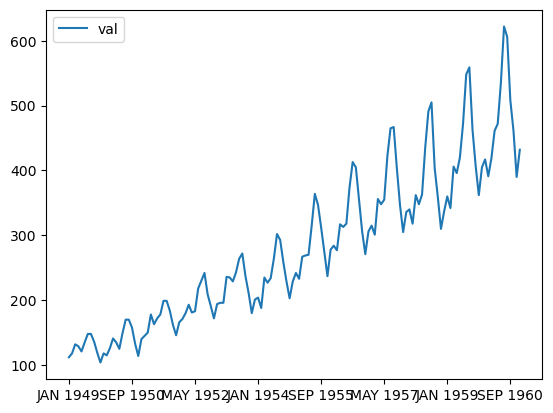

In [24]:
tsb.plot(y='val')

In [25]:
trainData = tsb.val[:-12].to_numpy()
testData = tsb.val[-12:].to_numpy()
testData.shape

(12,)

<Axes: >

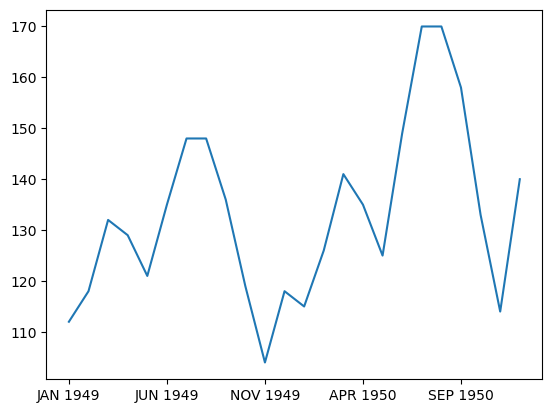

In [26]:
tsb.val[:24].plot(x='date',y='val')

In [27]:
def diff(x,p=1):
    if p == 2:
        return x[2:] - 2 * x[1:-1] + x[:-2]
    return x[1:] - x[:-1]

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

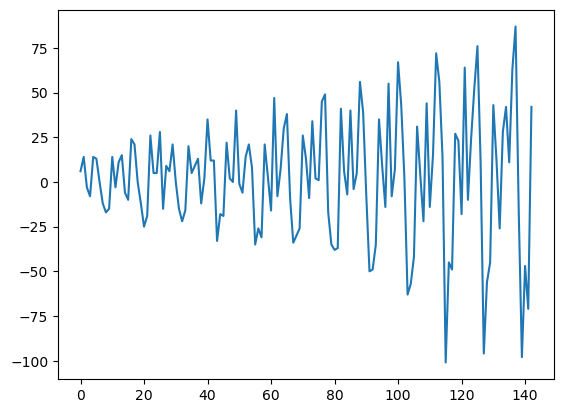

In [29]:
plt.plot(diff(tsb.val.to_numpy()))

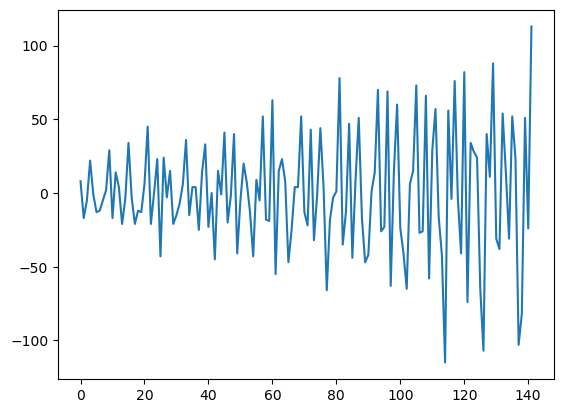

In [30]:
plt.plot(diff(tsb.val.to_numpy(),p=2))

In [31]:
def movAv(x,p):
    if p % 2 == 0:
        p2 = p//2
        nx = x[:-p-1]*0
        for i in range(nx.shape[0]):
            nx[i] = (np.sum(x[i:p+i]) / p + np.sum(x[i+1:i+p+1]) / p)/2
        return nx
    nx = np.cumsum(x, dtype=float)
    nx[p:] = nx[p:] - nx[:-p]
    return nx[p - 1:] / p
    


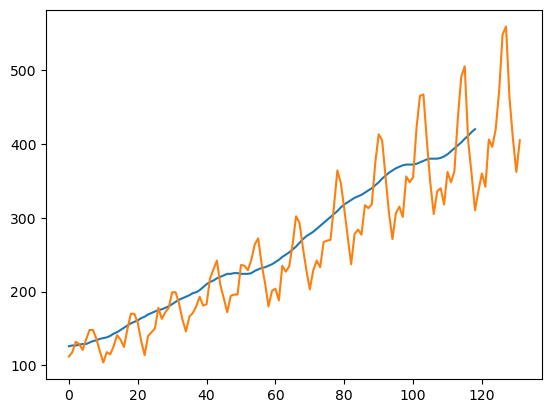

In [32]:
mAs = movAv(trainData,12)
plt.plot(mAs)
plt.plot(trainData)
plt.show()

In [33]:
from sklearn import linear_model


In [37]:
mAs = mAs.reshape(119,1)
mAs.shape

(119, 1)

In [39]:
x = np.arange(119) + 7
x = x.reshape(119,1)
x[:10]

array([[ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16]])

In [40]:
regr = linear_model.LinearRegression()
# Train the model using the training sets
regr.fit(x, mAs)
regr.coef_

array([[2.57552343]])

In [41]:
regr.coef_[0]

array([2.57552343])

In [42]:
regr.intercept_

array([88.61209229])

In [43]:
def trend(x):    
    return regr.intercept_[0]+regr.coef_[0,0]*(x)

ValueError: x and y must have same first dimension, but have shapes (119,) and (131,)

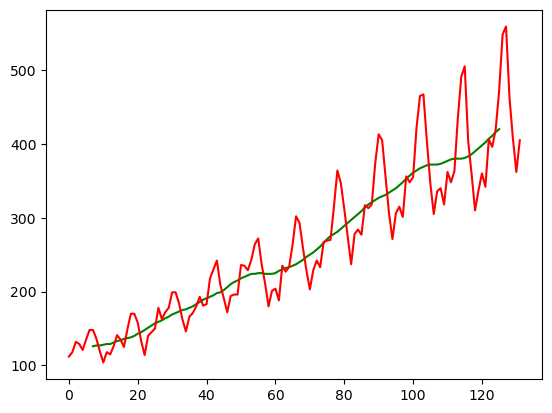

In [45]:
mAs = movAv(trainData,12)
plt.plot(np.arange(119)+7,mAs,color='green')
plt.plot(trainData,color='red')
plt.plot(np.arange(119)+7,trend(np.arange(131)+7),color='blue')
plt.show()

In [46]:
x = np.arange(119)+7
(119-11)/12
trainData = trainData.reshape(132,1)
tr = trend(x).reshape(119,1)
tmp = trainData[7:-6] - tr
tmp.shape

(119, 1)

In [47]:
tmp = trainData[7:-6] - tr
season = np.zeros(12)
for i in range(12):
    season[i] = np.mean(tmp[i::12])
season

array([ 59.08097849,  17.50545506, -17.77006837, -49.2455918 ,
       -25.52111523, -21.39663866, -30.07216209,   5.35231449,
        -4.82320894,  -1.99873237,  35.5257442 ,  63.40336134])

In [48]:
def seasc(t):
    return season[(t+6)%12]

In [49]:
def linpred(t):
    return trend(t) + seasc(t)

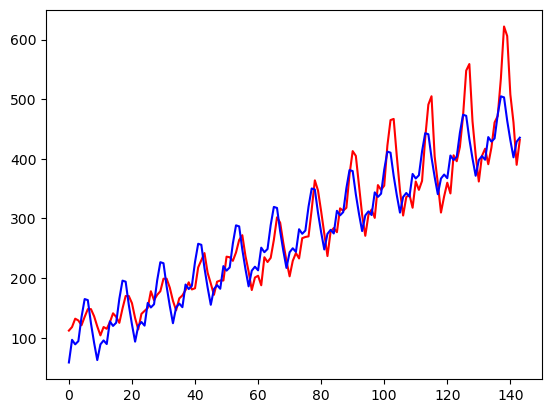

In [53]:
x = np.arange(144)
plt.plot(tsb.val.to_numpy(),color='red')
plt.plot(x,linpred(x),color='blue')
plt.show()

In [51]:
x = np.arange(tsb.val.shape[0])
x = x.reshape(tsb.val.shape[0],1)
x.shape

(144, 1)

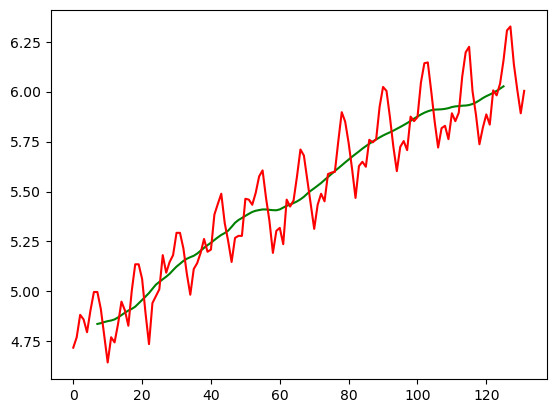

In [59]:
trainlog = np.log(trainData)
mAslog = movAv(trainlog,12)
x = np.arange(119)+7
plt.plot(x,mAslog,color='green')
plt.plot(trainlog,color='red')
plt.show()

In [60]:
mAslog.shape

(119, 1)

In [61]:
mAslog = mAslog.reshape(119,1)
x = x.reshape(119,1)
mAslog.shape

(119, 1)

In [62]:
x.shape

(119, 1)

In [64]:
regrlog = linear_model.LinearRegression()
# Train the model using the training sets
regrlog.fit(x, mAslog)
regrlog.coef_[0,0]

0.010416682273595108

In [65]:
regrlog.intercept_[0]

4.797461751900277

In [66]:
def trendlog(x):    
    return regrlog.intercept_[0]+regrlog.coef_[0,0]*(x)

In [68]:
x = np.arange(119)+7
tr = trendlog(x).reshape(119,1)
seasonlog = np.zeros(12)
tmp = np.log(trainData[7:-6]) - tr
tmp.shape


(119, 1)

In [69]:
for i in range(12):
    seasonlog[i] = np.mean(tmp[i::12])

def seasclog(t):
    return seasonlog[(t+6)%12]

def logpred(t):
    return np.exp(trendlog(t) + seasclog(t))

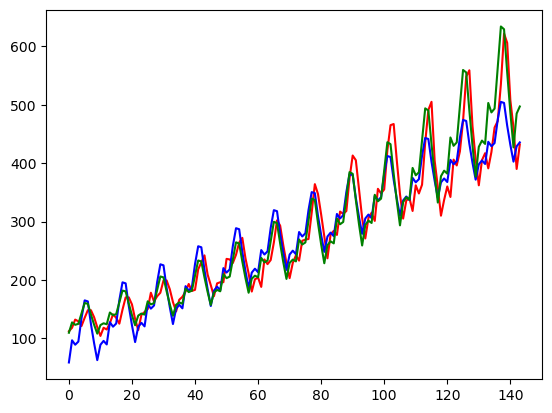

In [70]:
x = np.arange(144)
plt.plot(tsb.val.to_numpy(),color='red')
plt.plot(x,linpred(x),color='blue')
plt.plot(x,logpred(x),color='green')
plt.show()

In [71]:
from sklearn.metrics import mean_squared_error as mse
testData = testData.reshape(testData.shape[0],1)
testData.shape

(12, 1)

In [78]:
mse(testData,logpred(np.arange(12)+131))

1588.4669396108836

In [79]:
mse(testData,linpred(np.arange(12)+131))

2826.051997376928

экспоненциальная модель оказалась лучше